# NETFLIX MOVIE

#####                                                                                                                               VÕ HỬU NGHĨA - 20133074

 ## I. DATA PROCESSING


 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

 ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [28]:
netflix_df = pd.read_csv("./netflix_titles.csv")
#netflix_df.head()
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4357,80219127,Movie,Avengers: Infinity War,"Anthony Russo, Joe Russo","Robert Downey Jr., Josh Brolin, Mark Ruffalo, ...",United States,25-Dec-18,2018,PG-13,150 min,"Action & Adventure, Sci-Fi & Fantasy",Superheroes amass to stop intergalactic sociop...
4371,80107989,TV Show,Watership Down,Noam Murro,"James McAvoy, Nicholas Hoult, John Boyega, Ben...","Ireland, United Kingdom, United States",23-Dec-18,2018,TV-PG,1 Season,"British TV Shows, International TV Shows, TV A...",A warren of rabbits battles many threats on th...
3424,70118799,Movie,Ip Man,Wilson Yip,"Donnie Yen, Simon Yam, Louis Fan, Lam Ka Tung,...","Hong Kong, China",15-Jan-16,2008,R,107 min,"Action & Adventure, Dramas, International Movies",An occupying Japanese general challenges Chine...
5359,81033430,Movie,Music Teacher,Sarthak Dasgupta,"Manav Kaul, Amrita Bagchi, Divya Dutta, Neena ...",India,19-Apr-19,2019,TV-14,102 min,"Dramas, Independent Movies, International Movies",A dejected small-town music teacher grapples w...
3703,80140938,TV Show,In Between,NaN,"Janel Tsai, Johnny Lu, Darren Chiu, Vivi Lee, ...",Taiwan,1-Jan-17,2012,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",An author having trouble finishing his new rom...


SỐ LƯỢNG GIÁ TRỊ DUY NHẤT CỦA MỖI CỘT TRONG DATAFRAME

In [29]:
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

XEM KIỂU DỮ LIỆU CŨNG NHƯ XEM TỔNG QUAN CÓ TRƯỜNG NÀO THIẾU GIÁ TRỊ

In [30]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


TỔNG SỐ GIÁ TRỊ NULL

In [31]:
netflix_df.isnull().sum().sum()

3036

CHI TIẾT SÓ LƯỢNG GIÁ TRỊ NULL CỦA TỪNG THUỘC TÍNH

In [32]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

TRỰC QUAN MỨC ĐỘ PHÂN BỐ CỦA GIÁ TRỊ NULL 

Text(0.5, 1.0, 'Null Values Heatmap')

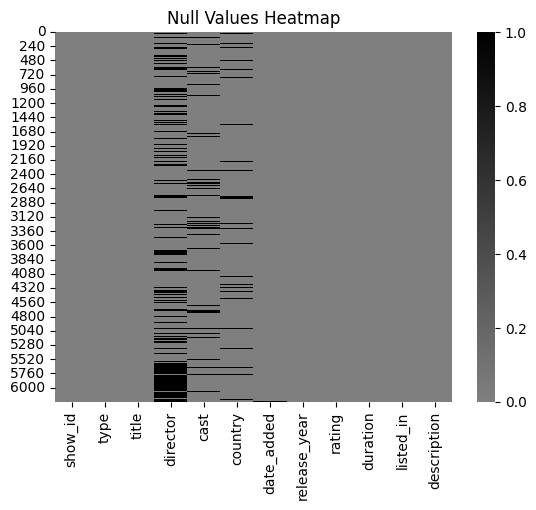

In [33]:
heatmap = sns.heatmap(netflix_df.isnull(), cmap="binary", center=0, cbar=True)
heatmap.set_title("Null Values Heatmap")

THAY THẾ CÁC GIÁ TRỊ NULL BẰNG CHUỖI MỚI, ĐỒNG THỜI DO 2 THUỘC TÍNH LÀ 'date_added' và 'rating' có ý giá trị null nên ta xoá những dòng có giá trị null lun

In [34]:

netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('Country Unavailable', inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

# netflix_df = netflix_df.pipe(lambda x: x.fillna({
#     'director': 'No Director',
#     'cast': 'No Cast',
#     'country': 'Country Unavailable'
# })).pipe(lambda x: x.dropna(subset=['date_added', 'rating']))


tạo ra 2 cột mới là năm và tháng được lấy từ year_added

In [35]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year.astype('int64')
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month.astype('int64')

KIỂM TRA LẠI XEM CÓ THUỘC TÍNH CÒN GIÁ TRỊ NULL KHÔNG

In [36]:
netflix_df.isnull().any()


show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
year_added      False
month_added     False
dtype: bool

KIỂM TRA LẠI KIỂU DỮ LIỆU CŨNG NHƯ GIÁ TRỊ CỦA CÁC THUỘC TÍNH

In [37]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6214 entries, 0 to 6222
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      6214 non-null   object
 4   cast          6214 non-null   object
 5   country       6214 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
 12  year_added    6214 non-null   int64 
 13  month_added   6214 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 728.2+ KB


TẠO DATAFRAME MỚI ĐỂ LƯU CÁC BỘ PHIM THUỘC THỂ LOẠI MOVIE 

In [38]:
netflix_df_type_Movie = netflix_df[netflix_df["type"]=="Movie"].copy()
netflix_df_type_Movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",8-Sep-17,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,8-Sep-17,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017,9


TẠO DATAFRAME MỚI ĐỂ LƯU CÁC BỘ PHIM THUỘC THỂ LOẠI TV SHOW

In [39]:
netflix_df_type_TVShow = netflix_df[netflix_df["type"]=="TV Show"].copy()
netflix_df_type_TVShow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,8-Sep-17,2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,2017,9
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,8-Sep-17,2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",2017,9
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,7-Sep-18,2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...,2018,9


XỬ LÍ DỮ LIỆU TRÊN TẬP netflix_df_type_Movie và netflix_df_type_TVShow

- Đổi tên cột, xoá đơn vị tính và chuyển sang kiểu int64

In [40]:
netflix_df_type_TVShow.rename(columns= {'duration':'seasons'},inplace = True)
netflix_df_type_TVShow.seasons = netflix_df_type_TVShow.seasons.astype(str).str.replace(r'Season.*$','',regex=True).astype('int64')
netflix_df_type_Movie.rename(columns={'duration':'duration_min'},inplace=True)
netflix_df_type_Movie.duration_min = netflix_df_type_Movie.duration_min.astype(str).str.replace(r'min.*$','',regex=True).astype('int64')

## II. EXPLORATORY ANALYSIS AND VISUALIZATION

In [41]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
1733,81085319,Movie,PATRICK (2019),Mandie Fletcher,"Beattie Edmondson, Ed Skrein, Tom Bennett, Jen...",United Kingdom,16-May-19,2019,TV-PG,94 min,Comedies,"When a schoolteacher inherits an adorable pug,...",2019,5
3209,81037986,Movie,Chaotic Love Poems,Garin Nugroho,"Chicco Jerikho, Pevita Pearce",Indonesia,5-Jan-19,2016,TV-14,86 min,"Dramas, International Movies, Romantic Movies","Spanning the 1970s, ‘80s and ‘90s, this lyrica...",2019,1
2352,80238296,Movie,Kanika,No Director,"Sharad Ponkshe, Smita Shewale",India,1-Mar-18,2017,TV-14,110 min,"Horror Movies, International Movies, Thrillers",A doctor and his colleagues who use sex-determ...,2018,3
1674,80098046,TV Show,12 Years Promise,No Director,"So-yeon Lee, Namkoong Min, Tae-im Lee, So-hui ...",South Korea,22-May-17,2014,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A pregnant teen is forced by her family to lea...,2017,5
5656,80011206,TV Show,Zoo,No Director,"James Wolk, Kristen Connolly, Nonso Anozie, No...",United States,"October 3, 2017",2017,TV-14,3 Seasons,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",When animal species all over the world begin a...,2017,10


Tổng số lượng của 2 thể loại là Movie và Tv Show

Text(0.5, 0, 'Total Count')

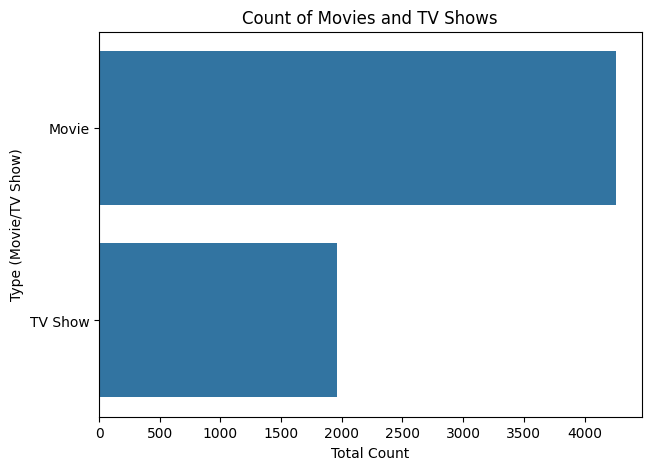

In [42]:
plt.figure(figsize=(7,5))
Type = sns.countplot(netflix_df.type)

'''Full parameters'''
# plt.figure(num=1,figsize=(7,5),dpi=80,facecolor='lightblue',edgecolor='black',frameon=True,clear=False)
# Type = sns.countplot(netflix_df.type)
Type.set_title("Count of Movies and TV Shows")
Type.set_ylabel("Type (Movie/TV Show)")
Type.set_xlabel("Total Count")


Chuyển sang dạng biểu đồ tròn thể hiện phần trăm

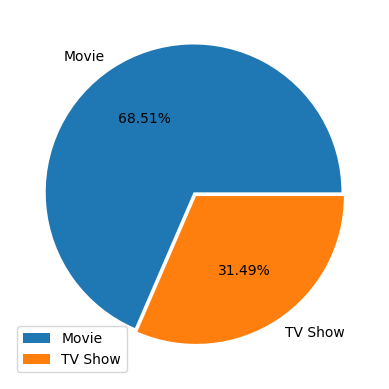

In [43]:
Percentage = plt.pie(netflix_df.type.value_counts(), labels= netflix_df.type.value_counts().index, explode=(0.015,0.015),autopct="%0.2f%%")
#plt.title("Distribution of Content Types on Netflix")
plt.legend()
plt.show()


Đếm số lượng đánh giá 

C:\Users\vhngh\AppData\Local\Temp\ipykernel_5036\1607855347.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  Rating = sns.countplot(netflix_df.rating,palette='Set3')


Text(0, 0.5, 'Rating')

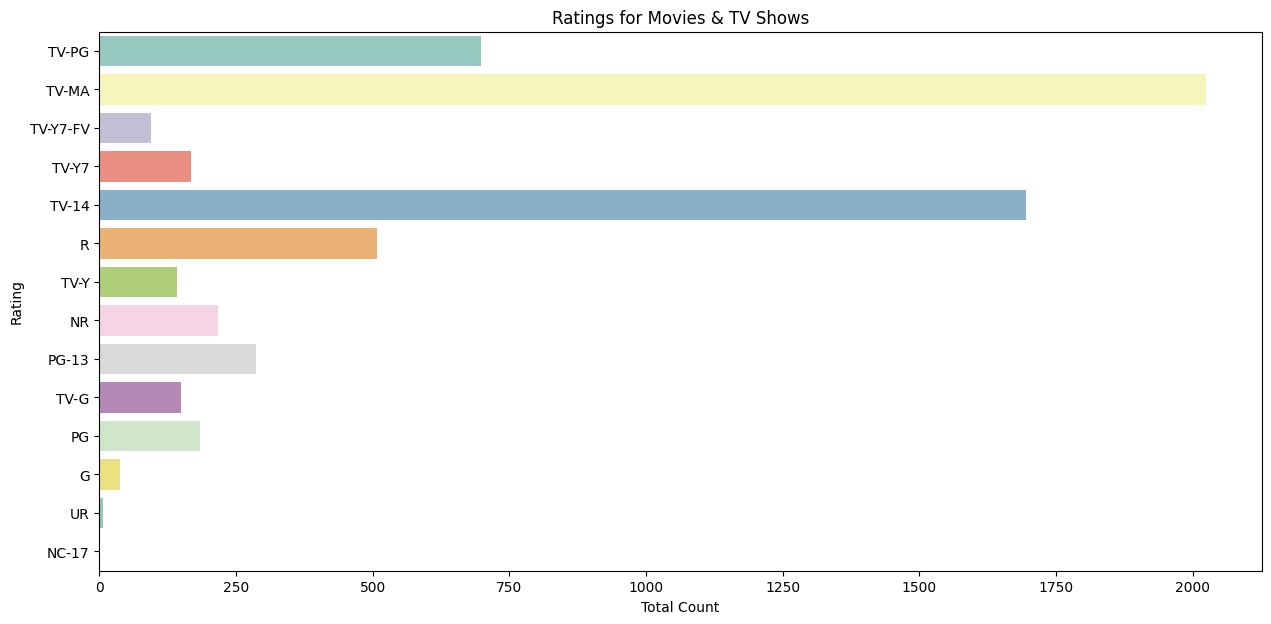

In [44]:
#rating =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
Rating = sns.countplot(netflix_df.rating,palette='Set3')
Rating.set_title("Ratings for Movies & TV Shows")
Rating.set_xlabel("Total Count")
Rating.set_ylabel("Rating")


Tổng số đánh giá của từng thể loại 

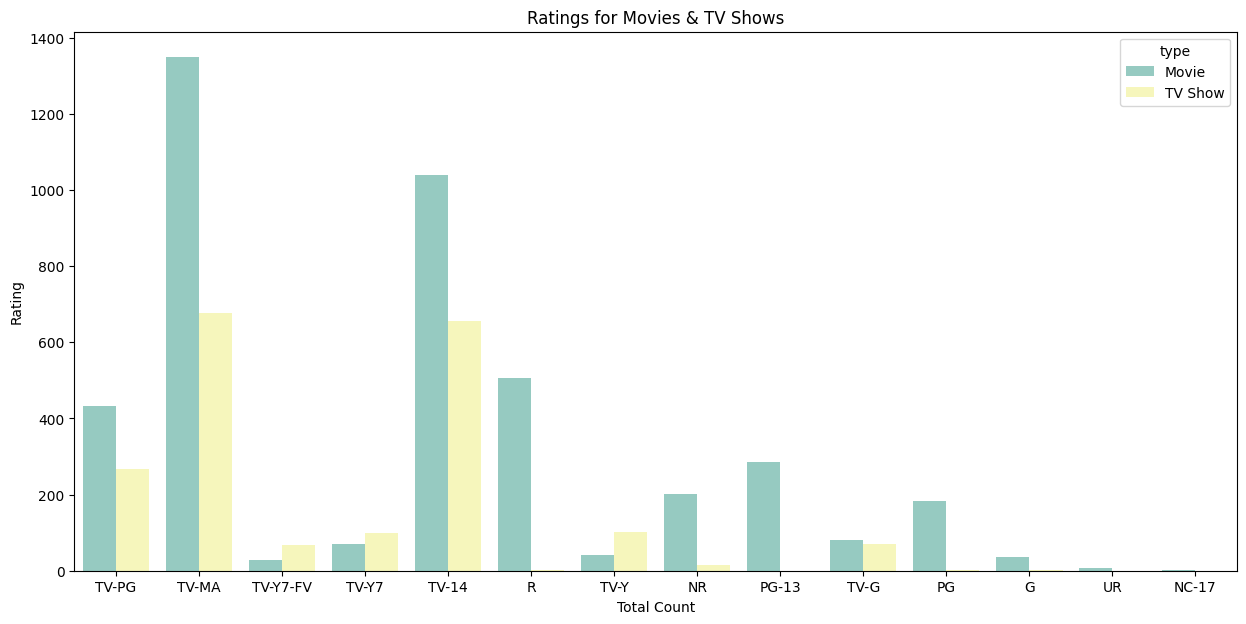

In [45]:
plt.figure(figsize=(15, 7))
Rating = sns.countplot(x=netflix_df.rating,hue=netflix_df.type, palette='Set3')

Rating.set_title("Ratings for Movies & TV Shows")
Rating.set_xlabel("Total Count")
Rating.set_ylabel("Rating")

plt.show()

Đếm số lượng bộ phim được thêm netflix theo từng năm

In [46]:
netflix_year = netflix_df[netflix_df['year_added'] != 2020]['year_added'].value_counts().reset_index()
netflix_year.columns = ['year', 'count']
netflix_year


,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
4,2015,88
5,2014,25
6,2011,13
7,2013,12
8,2012,7
9,2009,2


Trực quan hoá số liệu ở trên

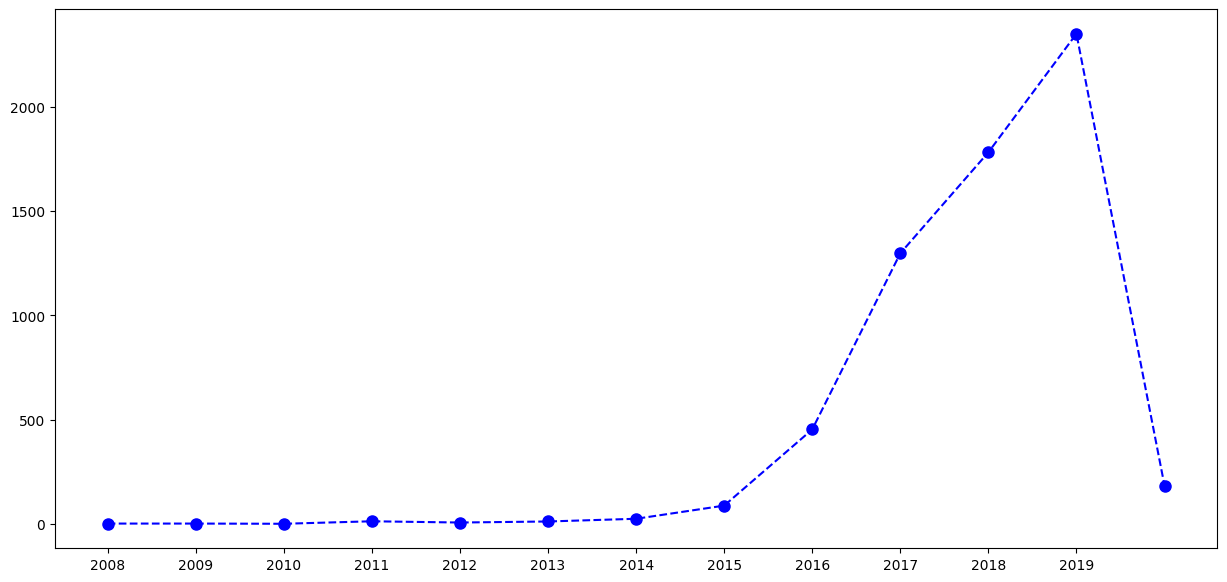

In [47]:
plt.figure(figsize=(15, 7))
plt.plot(netflix_df.year_added.value_counts().sort_index().index, netflix_df.year_added.value_counts().sort_index().values,color='blue', linestyle='--', marker='o', markersize=8)
plt.xticks(np.arange(2008, 2020, 1))
plt.show()

In [48]:
netflix_df_type_TVShow.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,listed_in,description,year_added,month_added
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob...",2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,9


Tương tự như biểu đồ trên nhưngcó thêm 2 giá trị của biến type, dùng để biểu dữ số lượng bộ phim theo từng thể loại được thêm vào qua từng năm

Text(0.5, 0, 'Year')

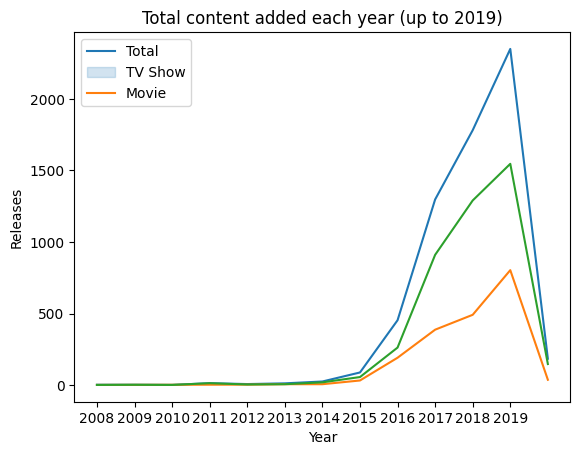

In [49]:
#đếm số lượng theo từng nhóm 
year_counts = netflix_df.groupby('year_added')['type'].count()
year_counts_TvShow = netflix_df_type_TVShow.groupby('year_added')['type'].count()
year_counts_Movie = netflix_df_type_Movie.groupby('year_added')['type'].count()

sns.lineplot(x=year_counts.index, y=year_counts.values)
sns.lineplot(x=year_counts_TvShow.index, y=year_counts_TvShow.values)
sns.lineplot(x=year_counts_Movie.index, y=year_counts_Movie.values)

plt.xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','TV Show','Movie'])
plt.ylabel("Releases")
plt.xlabel("Year")

Mức độ phân tán của các bộ phim theo từng năm qua từng năm

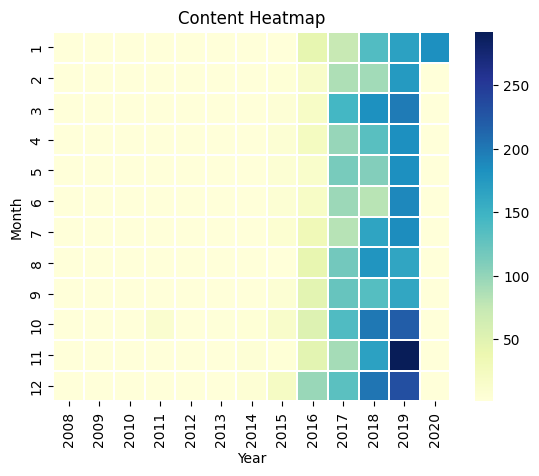

In [50]:
month_year_df = netflix_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(1).T
sns.heatmap(month_year_df, linewidths=0.025, cmap="YlGnBu")

plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

Xem thời gian kéo dài của Movie và TV Show

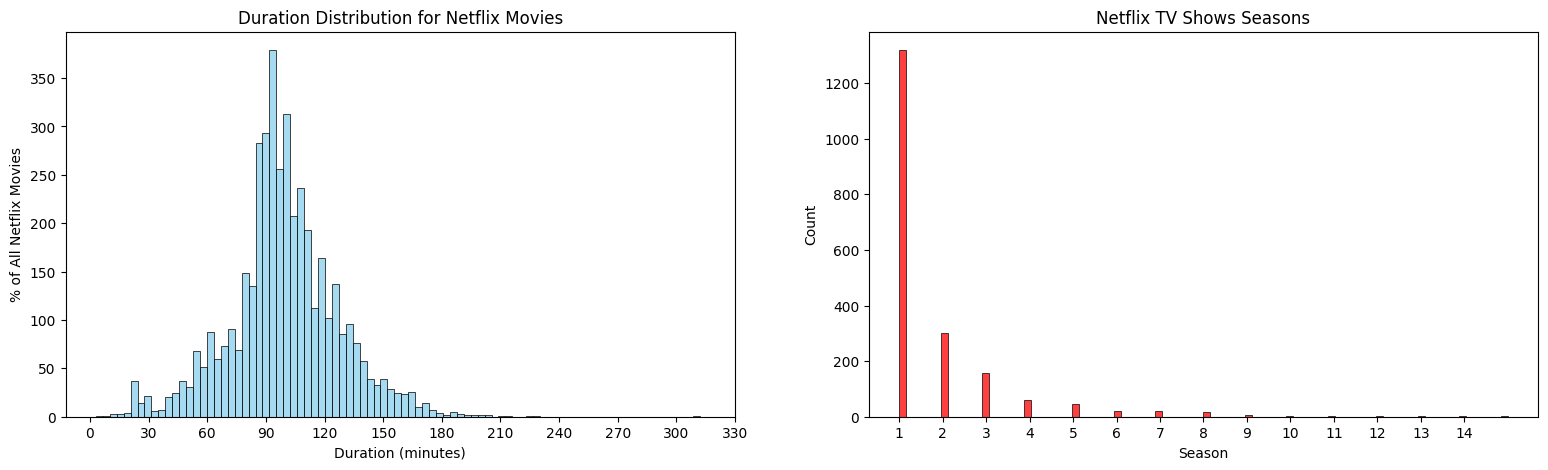

In [51]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))

# Biểu đồ phân phối độ dài các bộ phim movie(min)
Duration_min = sns.histplot(netflix_df_type_Movie.duration_min, color='skyblue',ax=ax[0]);
Duration_min.set_xticks(np.arange(0,360,30))
Duration_min.set_title("Duration Distribution for Netflix Movies")
Duration_min.set_ylabel("% of All Netflix Movies")
Duration_min.set_xlabel("Duration (minutes)")
#Biểu đồ phân phối độ dài các TV Show(seasón)
Seasons = sns.histplot(netflix_df_type_TVShow.seasons, color='red',ax=ax[1]);
Seasons = plt.xticks(np.arange(1, 15, 1))
Seasons = plt.title("Netflix TV Shows Seasons")
Seasons = plt.xlabel("Season")
Seasons = plt.ylabel("Count")


Top 10

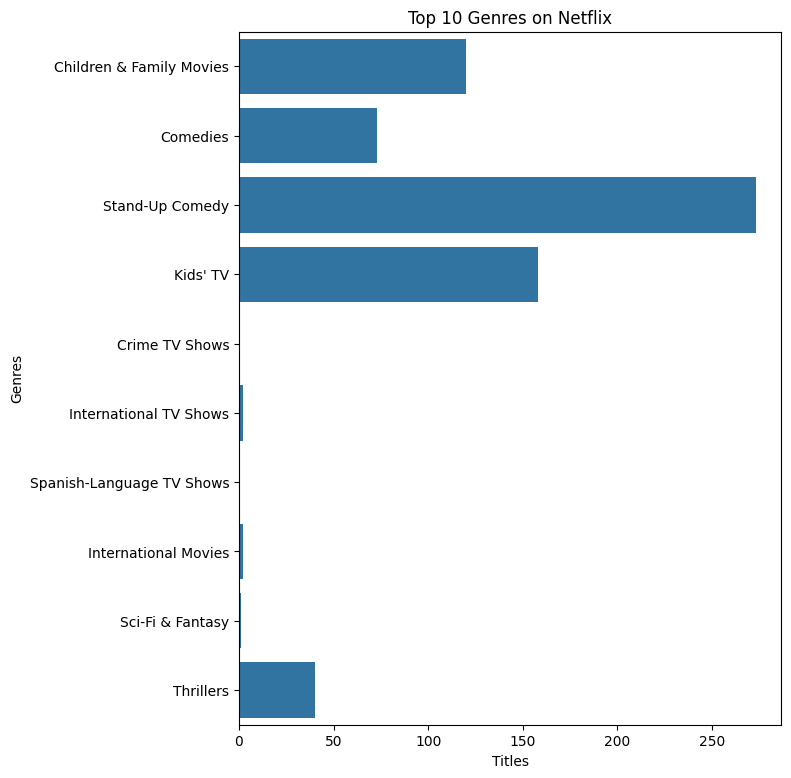

In [52]:

# Tách các giá trị trong cột 'listed_in' và loại bỏ giá trị trùng lặp
filtered_genres = netflix_df['listed_in'].str.split(', ', expand=True).stack().unique()
# Tạo biểu đồ countplo
plt.figure(figsize=(7, 9))
g = sns.countplot(y=netflix_df['listed_in'], order=filtered_genres[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()